<a href="https://colab.research.google.com/github/Untick/Usedesk/blob/main/Murunov%20Roman/final_%22%5Bai_stage%5D_Murunov_v2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

План:
- [Загрузка библиотек](#cell-libs)
- [Загрузка данных](#cell-load-data)
- [Аналитика](#cell-analytics)
- [Корректировка значений](#cell-fix-data)
- [Corellation Heatmap](#cell-Heatmap)
- [Выборка](#cell-sample)
- [Scaler](#cell-scaler)
- [Модель](#cell-model)
- [Обучение](#cell-learn)


<a name="cell-libs"></a>
# Загрузка библиотек

In [ ]:
import pandas as pd # Библиотека pandas
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
import seaborn as sns
from PIL import Image # Отрисовка изображений


from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization,Flatten # Основные слои
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения

from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline


from google.colab import drive


<a name="cell-load-data"></a>
# Загрузка данных

In [ ]:
# Подключаем гугл-диск
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# подгружаем файл
# только первый лист
# первые 2 столбца уадены
filename = '/content/drive/MyDrive/Colab Notebooks/db/[ai_stage]/usedesk_v2.csv'
df=pd.read_csv(filename, encoding = "utf-8", sep = ';')
df

,11779,comp_id_new,месяц_desc,дата,рейтинг,всего,есть ответ,выполнен,закрыт,nps,...,u-task,u_problem,u_incident,u_low,u_medium,u_urgent,u_extreme,licens,бз,бз_ст
0,1,1,1,01.06.2023,2,3709,3442,578,2466,1231,...,0,0,0,0,2,0,0,13,1,4
1,2,1,2,01.05.2023,2,5573,5301,36,4715,2004,...,0,0,0,0,5,0,0,13,1,4
2,3,1,3,01.04.2023,2,6138,5983,4,5496,2242,...,0,0,0,0,1,0,0,13,1,4
3,4,1,4,01.03.2023,2,7834,7664,1,7094,2851,...,0,0,0,0,6,0,0,13,1,4
4,5,1,5,01.02.2023,2,7344,7252,1,6657,2686,...,0,0,0,0,2,0,0,13,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11774,11775,465,1,01.05.2023,1,11,11,0,0,0,...,0,0,0,0,0,0,0,10,0,0
11775,11776,466,1,01.06.2023,1,88,12,0,84,0,...,0,0,0,0,2,0,0,9,0,0
11776,11777,466,2,01.05.2023,1,7,7,0,0,0,...,0,0,0,0,0,0,0,9,0,0
11777,11778,467,1,01.06.2023,1,57,55,0,25,1,...,0,0,0,0,2,0,0,3,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11779 entries, 0 to 11778
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   11779                   11779 non-null  int64 
 1   comp_id_new             11779 non-null  int64 
 2   месяц_desc              11779 non-null  int64 
 3   дата                    11779 non-null  object
 4   рейтинг                 11779 non-null  int64 
 5   всего                   11779 non-null  int64 
 6   есть ответ              11779 non-null  int64 
 7   выполнен                11779 non-null  int64 
 8   закрыт                  11779 non-null  int64 
 9   nps                     11779 non-null  int64 
 10  email                   11779 non-null  int64 
 11  telephony               11779 non-null  int64 
 12  api                     11779 non-null  int64 
 13  usedesk_chat            11779 non-null  int64 
 14  vk                      11779 non-null  int64 
 15  te

In [ ]:
df.describe()

,11779,comp_id_new,месяц_desc,рейтинг,всего,есть ответ,выполнен,закрыт,nps,email,...,u-task,u_problem,u_incident,u_low,u_medium,u_urgent,u_extreme,licens,бз,бз_ст
count,11779.000000,11779.000000,11779.000000,11779.000000,11779.000000,11779.000000,11779.000000,11779.000000,11779.000000,11779.000000,...,11779.000000,11779.000000,11779.0,11779.000000,11779.000000,11779.000000,11779.000000,11779.000000,11779.000000,11779.000000
mean,5890.000000,159.161219,18.870023,1.463112,10307.243824,4857.042618,2313.782240,5769.051363,1058.356906,3630.646744,...,0.000085,0.000085,0.0,0.028780,1.547075,0.015112,0.882842,15.379659,1.735631,86.883691
std,3400.448745,121.751784,14.419856,1.009327,31165.334547,13314.351860,9931.106132,20178.150736,4181.018183,13208.588675,...,0.009214,0.009214,0.0,0.308542,5.997698,0.251217,4.441047,25.375559,3.469083,257.139689
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2945.500000,54.000000,7.000000,1.000000,368.000000,145.000000,0.000000,9.000000,0.000000,56.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,5890.000000,131.000000,15.000000,1.000000,1958.000000,914.000000,86.000000,321.000000,2.000000,647.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,1.000000
75%,8834.500000,246.000000,28.000000,2.000000,7425.500000,3778.000000,1331.000000,2645.000000,353.000000,2720.500000,...,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,14.000000,2.000000,51.000000
max,11779.000000,468.000000,61.000000,3.000000,894142.000000,348032.000000,252164.000000,838365.000000,100978.000000,892563.000000,...,1.000000,1.000000,0.0,15.000000,289.000000,8.000000,150.000000,180.000000,30.000000,2673.000000


<a name="cell-analytics"></a>
# Аналитика

тут сохранена часть исследования данных, в работе не используется (дублируется в разделе Выборка)

In [ ]:
columns = df.columns.tolist()
columns

['11779',
 'comp_id_new',
 'месяц_desc',
 'дата',
 'рейтинг',
 'всего',
 'есть ответ',
 'выполнен',
 'закрыт',
 'nps',
 'email',
 'telephony',
 'api',
 'usedesk_chat',
 'vk',
 'telegram',
 'whatsapp',
 'fb_instagram',
 'chat',
 'instagram',
 'facebook',
 'pact_telegram_personal',
 'twitter-mention',
 'chat2desk',
 'slack_thread',
 'twitter-direct',
 'question',
 'task',
 'problem',
 'incident',
 'low',
 'medium',
 'urgent',
 'extreme',
 'агент+',
 'агент-',
 'каналы+ all',
 'каналы+ p',
 'каналы- all',
 'каналы- p',
 'правила_cnt',
 'правила_dist',
 'nps_cnt',
 'nps_avg',
 'u_question',
 'u-task',
 'u_problem',
 'u_incident',
 'u_low',
 'u_medium',
 'u_urgent',
 'u_extreme',
 'licens',
 'бз',
 'бз_ст']

In [ ]:
##############
# маски для выборки
##############
# факт рейтинг = 0
bad = df["рейтинг"] == 0


# факт рейтинг != 0
good = df["рейтинг"] != 0

##############
# ушли насовсем
##############

# в последний месяц рейтинг 0, список id компаний
current_bad_ids = df[(df[ "месяц_desc"] == 1) & ( df["рейтинг"] == 0 )].comp_id_new.unique()


#  маска по компаниям котоые в итоге ушли
current_bad_mask = df[ "comp_id_new"].isin(current_bad_ids)



#  маска по актуаальным компаниям
current_good_mask = df[ ~current_bad_mask ]








In [ ]:
df[df.рейтинг == 0].comp_id_new.unique()

array([  3,   4,   6,   8,   9,  22,  27,  29,  31,  40,  46,  50,  55,
        57,  68,  71,  80,  83,  84,  87,  95,  98, 101, 105, 106, 109,
       112, 114, 118, 120, 123, 127, 130, 137, 142, 148, 152, 153, 154,
       156, 157, 158, 161, 162, 164, 168, 172, 173, 175, 177, 179, 182,
       183, 187, 188, 190, 191, 195, 198, 199, 203, 209, 210, 211, 212,
       214, 223, 224, 226, 229, 230, 233, 234, 238, 242, 254, 262, 263,
       264, 267, 269, 270, 275, 287, 289, 290, 291, 292, 294, 297, 303,
       304, 311, 317, 320, 321, 326, 332, 339, 371, 374, 375, 381, 386,
       389, 392, 406, 410, 414, 430, 434, 438, 457])

In [ ]:
current_bad_ids

array([  3,   4,   6,   8,   9,  22,  27,  29,  31,  40,  46,  50,  55,
        57,  68,  71,  80,  83,  84,  87,  95,  98, 101, 105, 106, 109,
       112, 114, 118, 120, 123, 127, 130, 137, 142, 148, 152, 153, 154,
       156, 157, 158, 161, 162, 164, 168, 172, 173, 175, 177, 179, 182,
       183, 187, 188, 190, 191, 195, 198, 199, 203, 209, 210, 211, 212,
       214, 223, 224, 226, 229, 230, 233, 234, 238, 242, 254, 262, 263,
       264, 267, 269, 270, 275, 287, 289, 290, 291, 292, 294, 297, 303,
       304, 311, 317, 320, 321, 326, 332, 339, 371, 374, 375, 381, 386,
       389, 392, 406, 410, 414, 430, 434, 438, 457])

In [ ]:
# сейчас есть но был рейтинг 0 (приостонавливали работу)
df[ (~current_bad_mask) & (df["рейтинг"] == 0) ]  # таких нет


,11779,comp_id_new,месяц_desc,дата,рейтинг,всего,есть ответ,выполнен,закрыт,nps,...,u-task,u_problem,u_incident,u_low,u_medium,u_urgent,u_extreme,licens,бз,бз_ст


In [ ]:
# Ахтунг! вся история компаний не имеет положительного рейтинга
df[ current_bad_mask ].рейтинг.count()

2367

In [ ]:
# количество месяцев истории на каждую компанию
df[ current_bad_mask ].groupby('comp_id_new').comp_id_new.count()

comp_id_new
3      61
4      61
6      61
8      60
9      59
       ..
414     1
430     1
434     2
438     1
457     2
Name: comp_id_new, Length: 113, dtype: int64

In [ ]:
# дата последнего посещения
df[ current_bad_mask ].groupby('comp_id_new').дата.max()

comp_id_new
3      01.12.2022
4      01.12.2021
6      01.12.2021
8      01.12.2021
9      01.12.2021
          ...    
414    01.11.2022
430    01.01.2023
434    01.02.2023
438    01.02.2023
457    01.05.2023
Name: дата, Length: 113, dtype: object

<a name="cell-Heatmap"></a>
# Corellation Heatmap

<ipython-input-14-1800acd09b45>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask_1 = np.tril(df.corr())
<ipython-input-14-1800acd09b45>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(    df.corr(),


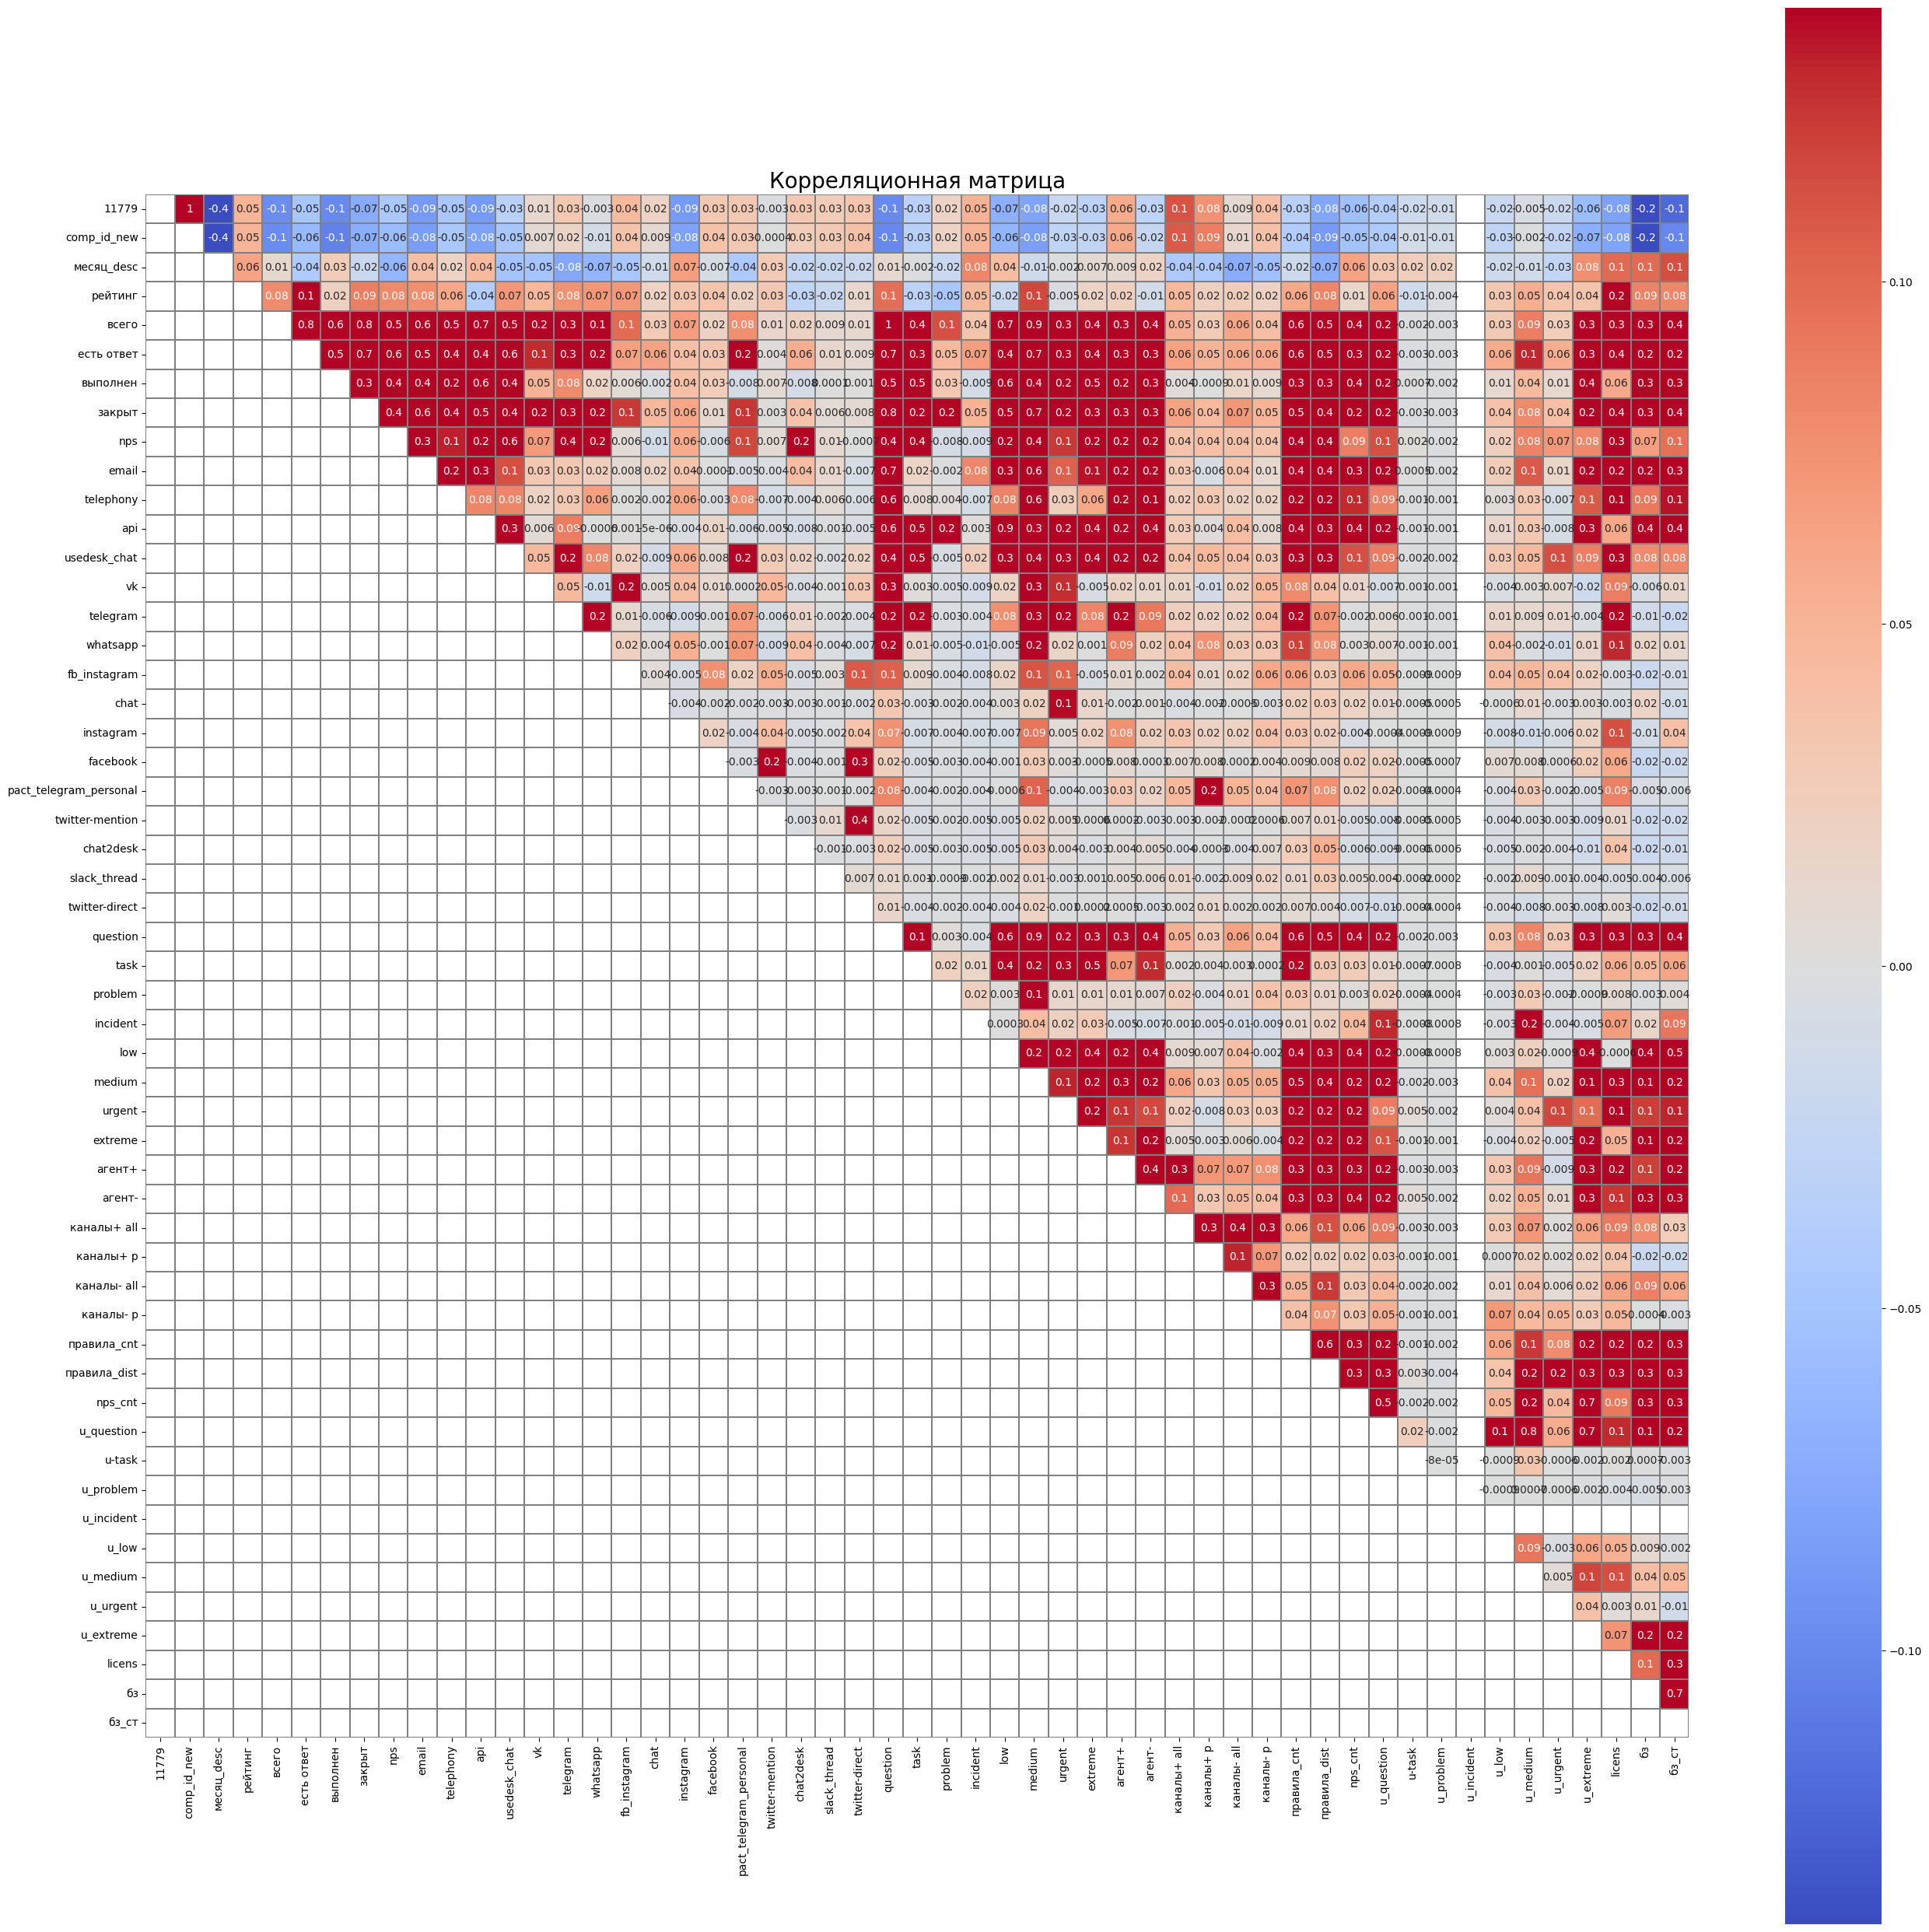

In [ ]:
#Corellation Heatmap
# Таблица корреляции признаков
mask_1 = np.tril(df.corr())
plt.figure(figsize=(32,32))
sns.heatmap(    df.corr(),
    cmap='coolwarm',
    vmin=-0.14,
    vmax=0.14,
    center= 0,
    square=True,
    annot=True,
    fmt='.1g',
    linewidths =0.05,
    linecolor= 'gray',
    mask = mask_1
)
plt.title("Корреляционная матрица", fontsize=20)
plt.show()

<a name="cell-fix-data"></a>
# Корректировка значений
* делаем бэкап
* корректируем рейтинг, для старых компаний, которые ушли проставляем рейтинг = 1
  * это некорректно, т.к. рейтинг может быть 2 или 3
  * корректировка рейтинга за предыдущие месяцы не используется в текущем варианте ноутбука
* удаляем дату
* корректируем поле nps_avg, тчобы оно стало числовым


In [ ]:
# backup
df_backup  = df.copy()
#df = df_backup.copy()

In [ ]:
# Корректировка рейтинга
# для всех компаний которые ушли рейтинг = 0 для всей истории
df.loc[(df.месяц_desc != 1) & ( df.рейтинг == 0 ),["рейтинг"]] = 1
# IDEA
# можно создать сетку без смещения по y для заполнения рейтинга вместо 1 полноценные 1\2\3

In [ ]:
# удалить колонку даты, она  не нравится standardscaler
df = df.drop('дата', axis=1)
df.head()

,11779,comp_id_new,месяц_desc,рейтинг,всего,есть ответ,выполнен,закрыт,nps,email,...,u-task,u_problem,u_incident,u_low,u_medium,u_urgent,u_extreme,licens,бз,бз_ст
0,1,1,1,2,3709,3442,578,2466,1231,1317,...,0,0,0,0,2,0,0,13,1,4
1,2,1,2,2,5573,5301,36,4715,2004,2008,...,0,0,0,0,5,0,0,13,1,4
2,3,1,3,2,6138,5983,4,5496,2242,1991,...,0,0,0,0,1,0,0,13,1,4
3,4,1,4,2,7834,7664,1,7094,2851,2519,...,0,0,0,0,6,0,0,13,1,4
4,5,1,5,2,7344,7252,1,6657,2686,2377,...,0,0,0,0,2,0,0,13,1,4


In [ ]:
#nps_avg to float
df['nps_avg'] = df['nps_avg'].apply(lambda x: float(str(x).replace(',', '.')))


<a name="cell-sample"></a>
# Выборка

в данном блоке идет попытка собрать предвыборку, т.е.:
* получить список компаний
* получить маску  хороших и плохих компаний good_ids, bad_ids
* разделить компании на тренеровочную и тестовую выыборку (ручные функции распределения, аналог train_test_split) x_train_ids, x_test_ids


In [ ]:
# цель: разделить comp_id_new на выборки по компаниям train test
# 1. делаем 2 списка = bad + good
# 2. делим каждый список пополам: так мы отфильтруем компании на большие и малые
# 3. каждый из 4 списков раскидываем по массивам train test с учетом соотношения (определить сколько компанийю 80% / 20% = 4 / 1)
# 4. собрать выборку x1,x2,y3
# 5. заполнить x_train x_test y_train y_test

##################
# 1
##################
# список идентификаторов bad
bad_ids = df[(df[ "месяц_desc"] == 1) & ( df["рейтинг"] == 0 )].comp_id_new.unique() # = current_bad_ids

# список идентификаторов good
good_ids = df[~df.comp_id_new.isin(bad_ids) ].comp_id_new.unique()  # = ~current_bad_ids


##################
# 2
##################
# получаем размерности списков идентификаторов компаний
cnt_bad_ids   = len(bad_ids)
cnt_good_ids  = len(good_ids)

# среднее значение идентификатора
cnt_bad_ids_half = int(cnt_bad_ids/2)
cnt_good_ids_half = int(cnt_good_ids/2)




bad_ids_1_2 = bad_ids[:cnt_bad_ids_half] # bad от начала до середины
bad_ids_2_2 = bad_ids[cnt_bad_ids_half:] # bad от середины до конца

good_ids_1_2 = good_ids[:cnt_good_ids_half] # good от начала до середины
good_ids_2_2 = good_ids[cnt_good_ids_half:] # good от середины до конца


In [ ]:
##################
# 3 идентификаторы
##################
# каждый из 4 списков раскидываем по массивам train test с учетом соотношения (определить сколько компанийю 80% / 20% = 4 / 1 = каждое пятое)


x_train_ids = []
x_test_ids  = []


# проходим по каждому списку
for arr_list in (bad_ids_1_2,bad_ids_2_2,good_ids_1_2,good_ids_2_2):
  for arr_val in range(len(arr_list)):
    if arr_val % 5 == 0: # каждый пятый отпавляем в x_test_ids
      x_test_ids.append(arr_list[arr_val])
    else:
      x_train_ids.append(arr_list[arr_val])


print('x_train_ids ', x_train_ids)
print('x_test_ids ', x_test_ids)

x_train_ids  [4, 6, 8, 9, 27, 29, 31, 40, 50, 55, 57, 68, 80, 83, 84, 87, 98, 101, 105, 106, 112, 114, 118, 120, 127, 130, 137, 142, 152, 153, 154, 156, 158, 161, 162, 164, 172, 173, 175, 177, 182, 183, 187, 188, 195, 198, 199, 203, 210, 211, 212, 214, 224, 226, 229, 230, 234, 238, 242, 254, 263, 264, 267, 269, 275, 287, 289, 290, 292, 294, 297, 303, 311, 317, 320, 321, 332, 339, 371, 374, 381, 386, 389, 392, 410, 414, 430, 434, 457, 2, 5, 7, 10, 12, 13, 14, 15, 17, 18, 19, 20, 23, 24, 25, 26, 30, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 48, 49, 51, 52, 54, 56, 58, 59, 61, 62, 63, 64, 66, 67, 69, 70, 73, 74, 75, 76, 78, 79, 81, 82, 86, 88, 89, 90, 92, 93, 94, 96, 99, 100, 102, 103, 107, 108, 110, 111, 115, 116, 117, 119, 122, 124, 125, 126, 129, 131, 132, 133, 135, 136, 138, 139, 141, 143, 144, 145, 147, 149, 150, 151, 159, 160, 163, 165, 167, 169, 170, 171, 176, 178, 180, 181, 185, 186, 189, 192, 194, 196, 197, 200, 202, 204, 205, 206, 208, 213, 215, 216, 218, 219, 220, 221, 225, 2

In [ ]:
# тестируем вывод первого месяца для первой компании
df[(df['comp_id_new'] == 1) & (df['месяц_desc'] == 1)]

,11779,comp_id_new,месяц_desc,рейтинг,всего,есть ответ,выполнен,закрыт,nps,email,...,u-task,u_problem,u_incident,u_low,u_medium,u_urgent,u_extreme,licens,бз,бз_ст
0,1,1,1,2,3709,3442,578,2466,1231,1317,...,0,0,0,0,2,0,0,13,1,4


# Собираем выборку

т.к. данных с  0 мало, собираем вручную на основе идентификаторов клиентов (которые собрали на предыдущем этапе).

Т.е. берем id клиента (arr_ids) и забиваем в нужную последовательность

Сделано 3 варианта набора данных:
* slice_splitter1
* slice_splitter2
* slice_splitter3

выборки 2 и 3 получили крайне малое число значений (см. print shape), т.к. там есть ограничение на время жизни компании более 6 месяцев, поэтому далее будет использоваться результат slice_splitter1

Также ниже идет преобразование в one_hot_ecoding через utils

In [ ]:
# новая версия slice_splitter1, заменил заполнение глобальных переменных на return
def slice_splitter1 (df, arr_ids):
  # функия разделяет элементы датафрейма df на основе id из списка arr_ids по массивам arr_x и arr_y
  arr_x = []
  arr_y = []

  for i in arr_ids:  # перебираем массив с идентификатрами
      cnt = len(df[df['comp_id_new'] == i]) # смотрим количество месяцев по каждой компании
      # логика
      x = cnt
      y = cnt - 1
      while y > 0:  # условие перебора
          arr_x.append( df[(df['comp_id_new'] == i) & (df['месяц_desc'] == y)].values.reshape(-1) )          # добавляем df с индексом месяца x в x_train
          arr_y.append( int(df[(df['comp_id_new'] == i) & (df['месяц_desc'] == y)].рейтинг) )  # добавляем df с индексом месяца y - 1 в y_train
          # перебираем счетчик
          x = x - 1
          y = y - 1
  arr_x = np.array(arr_x)
  arr_y = np.array(arr_y)
  return arr_x, arr_y


x1_train ,y1_train = slice_splitter1(df, x_train_ids )  #заполняем тренеровочную выборку
x1_test, y1_test  = slice_splitter1(df, x_test_ids) #заполняем тестовую выборку




print('x1_train.shape: ', x1_train.shape)
print('y1_train.shape: ', y1_train.shape)

print('x1_test.shape: ', x1_test.shape)
print('y1_test.shape: ', y1_test.shape)



print('x1_train[x]',  x1_train[1])
print('y1_train[x]',  y1_train[1])

print('x1_test[x]',   x1_test[1])
print('y1_test[x]',   y1_test[1])


x1_train.shape:  (8965, 54)
y1_train.shape:  (8965,)
x1_test.shape:  (2346, 54)
y1_test.shape:  (2346,)
x1_train[x] [2.3500e+02 4.0000e+00 5.9000e+01 1.0000e+00 6.6610e+03 2.5200e+02
 3.5930e+03 2.0700e+02 2.1720e+03 6.6610e+03 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 6.5230e+03 1.3800e+02 0.0000e+00 0.0000e+00 3.3000e+01
 4.1590e+03 2.4520e+03 1.7000e+01 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.1607e+04 2.0000e+01 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 2.0000e+01 2.0000e+00 1.0000e+01]
y1_train[x] 1
x1_test[x] [174.   3.  59.   1. 776. 339. 278. 261.   0. 776.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 776.   0.   0.
   0.   0. 776.   0.   0.   0.   0.   0.   0.   0.   0. 330.   3.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  

In [ ]:
# конфигурация x6, y1
def slice_splitter2 (df, arr_ids):
  # функия разделяет элементы датафрейма df на основе id из списка arr_ids по массивам arr_x и arr_y
  arr_x = []
  arr_y = []

  for i in arr_ids:  # перебираем массив с идентификатрами
    cnt = len(df[df['comp_id_new'] == i]) # смотрим количество месяцев по каждой компании
    if (cnt >=6):
      # создаем массив y
      arr_y.append( int(df[(df['comp_id_new'] == i) & (df['месяц_desc'] == 1)].рейтинг) )  # добавляем df с индексом месяца y = 1 в y_train

      arr_x_tmp = []
      for month in range(6, 1, -1): # перебираем месяцы с 6 по 2
          arr_x_tmp.append( df[(df['comp_id_new'] == i) & (df['месяц_desc'] == month)].values.reshape(-1) )          # добавляем df с индексом месяца x в x_train
      arr_x.append( np.array(arr_x_tmp).reshape(-1) )


  # to numpy
  arr_x = np.array(arr_x)
  arr_y = np.array(arr_y)
  return arr_x, arr_y

#заполняем тренеровочную выборку
x2_train, y2_train = slice_splitter2(df, x_train_ids ) # заполняем массив на основе идентификаторов
x2_test, y2_test = slice_splitter2(df, x_test_ids ) # заполняем массив на основе идентификаторов


print('x2_train.shape',x2_train.shape)
print('y2_train.shape',y2_train.shape)
print('x2_test.shape',x2_test.shape)
print('y2_test.shape',y2_test.shape)


print('x2_train[x]',  x2_train[1])
print('y2_train[x]',  y2_train[1])
print('x2_test[x]',   x2_test[1])
print('y2_test[x]',   y2_test[1])


x2_train.shape (332, 270)
y2_train.shape (332,)
x2_test.shape (86, 270)
y2_test.shape (86,)
x2_train[x] [2.9400e+02 6.0000e+00 6.0000e+00 1.0000e+00 5.1647e+04 6.2720e+03
 0.0000e+00 2.2613e+04 0.0000e+00 9.1000e+02 0.0000e+00 5.0737e+04
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 8.5600e+02 4.8735e+04 1.5520e+03 5.0400e+02 0.0000e+00
 1.9584e+04 3.0797e+04 1.2660e+03 0.0000e+00 6.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 3.9872e+04 1.0000e+01 1.0000e+00
 1.0000e+00 6.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 5.0000e+00 0.0000e+00 1.0000e+00 9.3000e+01 6.0000e+00 6.5000e+02
 2.9300e+02 6.0000e+00 5.0000e+00 1.0000e+00 6.1508e+04 6.5630e+03
 0.0000e+00 2.1820e+04 0.0000e+00 1.0360e+03 0.0000e+00 6.0472e+04
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 9.7700e+02 5.

In [ ]:
def slice_splitter3 (df, arr_ids):
  # функия разделяет элементы датафрейма df на основе id из списка arr_ids по массивам arr_x и arr_y
  arr_x = []
  arr_y = []
  arr_delta_x = []

  for i in arr_ids:  # перебираем массив с идентификатрами
    cnt = len(df[df['comp_id_new'] == i]) # смотрим количество месяцев по каждой компании
    if (cnt >=6):
      arr_y.append( int(df[(df['comp_id_new'] == i) & (df['месяц_desc'] == 1)].рейтинг) )  # добавляем  y1

      arr_x_tmp = []
      arr_delta_x_tmp = []
      for month in range(6, 1, -1): # перебираем месяцы с 6 по 1
          arr_x_tmp.append( df[(df['comp_id_new'] == i) & (df['месяц_desc'] == month)].values.reshape(-1) )          # добавляем df с индексом месяца x
          #if (month > 1):



      arr_x_tmp = np.array(arr_x_tmp).reshape(-1) # вытягиваем в 1 строку
      arr_x.append( arr_x_tmp ) # добавляем одну строку c


  arr_x = np.array(arr_x)
  arr_y = np.array(arr_y)

  return arr_x, arr_y


#заполняем тренеровочную выборку
x3_train, y3_train = slice_splitter3(df, x_train_ids ) # заполняем массив на основе идентификаторов
x3_test,  y3_test  = slice_splitter3(df, x_test_ids ) # заполняем массив на основе идентификаторов




print('x3_train.shape',x3_train.shape)
print('y3_train.shape',y3_train.shape)


print('x3_test.shape',x3_test.shape)
print('y3_test.shape',y3_test.shape)

x3_train.shape (332, 270)
y3_train.shape (332,)
x3_test.shape (86, 270)
y3_test.shape (86,)


In [ ]:
###########
# y => one hot encoding
##########
NUM_CLASSES = 4

print("\nвыборка 1 ########################\n")

y1_train_ohe  = utils.to_categorical(y1_train,  num_classes=NUM_CLASSES, dtype="float32")
y1_test_ohe   = utils.to_categorical(y1_test,   num_classes=NUM_CLASSES, dtype="float32")

print('y1_train_ohe.shape',y1_train_ohe.shape)
print('y1_test_ohe.shape',y1_test_ohe.shape)


print("\nвыборка 2 ########################\n")

y2_train_ohe  = utils.to_categorical(y2_train,  num_classes=NUM_CLASSES, dtype="float32")
y2_test_ohe   = utils.to_categorical(y2_test,   num_classes=NUM_CLASSES, dtype="float32")

print('y2_train_ohe.shape',y2_train_ohe.shape)
print('y2_test_ohe.shape',y2_test_ohe.shape)


print("\nвыборка 3 ########################\n")

y3_train_ohe  = utils.to_categorical(y3_train,  num_classes=NUM_CLASSES, dtype="float32")
y3_test_ohe   = utils.to_categorical(y3_test,   num_classes=NUM_CLASSES, dtype="float32")

print('y3_train_ohe.shape',y3_train_ohe.shape)
print('y3_test_ohe.shape',y3_test_ohe.shape)







выборка 1 ########################

y1_train_ohe.shape (8965, 4)
y1_test_ohe.shape (2346, 4)

выборка 2 ########################

y2_train_ohe.shape (332, 4)
y2_test_ohe.shape (86, 4)

выборка 3 ########################

y3_train_ohe.shape (332, 4)
y3_test_ohe.shape (86, 4)


In [ ]:
# выбираем выборку


x_train     = x1_train
y_train     = y1_train_ohe

x_test      = x1_test
y_test      = y1_test_ohe

x_all = np.concatenate([x_train, x_test]  ) # сожержит все значения  x_train и x_test для scaler


<a name="cell-scaler"></a>
# Scaler

In [ ]:
# scaler

# подготовка к обучению модели
scaler = StandardScaler(with_mean=False) # Нормализуем данные
scaler.fit(x_all) # тренеруем scaler на всех данных
x_train_scaled = scaler.transform(x_train) # тренеровочная выборка
x_test_scaled = scaler.transform(x_test)   # тестовая выборка


<a name="cell-model"></a>
# Модель

In [ ]:
# model
model = Sequential()

model.add(Dense(1000, input_dim=x_train.shape[1]))
model.add(Dense(100, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              55000     
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
Total params: 155504 (607.44 KB)
Trainable params: 155504 (607.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
    )


<a name="cell-learn"></a>
# обучение

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=200,
    validation_data=(x_test, y_test),
    verbose=1
    )


Epoch 1/200
281/281 [==============================] - 4s 5ms/step - loss: 224.9151 - accuracy: 0.4638 - val_loss: 729.2188 - val_accuracy: 0.3406
Epoch 2/200
281/281 [==============================] - 1s 5ms/step - loss: 171.5545 - accuracy: 0.4875 - val_loss: 765.9428 - val_accuracy: 0.3998
Epoch 3/200
281/281 [==============================] - 1s 5ms/step - loss: 120.9366 - accuracy: 0.5026 - val_loss: 335.7115 - val_accuracy: 0.4506
Epoch 4/200
281/281 [==============================] - 2s 6ms/step - loss: 102.5240 - accuracy: 0.5260 - val_loss: 378.6372 - val_accuracy: 0.3994
Epoch 5/200
281/281 [==============================] - 2s 6ms/step - loss: 99.0671 - accuracy: 0.5337 - val_loss: 281.5903 - val_accuracy: 0.4770
Epoch 6/200
281/281 [==============================] - 1s 5ms/step - loss: 95.4345 - accuracy: 0.5370 - val_loss: 727.1495 - val_accuracy: 0.4629
Epoch 7/200
281/281 [==============================] - 1s 5ms/step - loss: 104.9760 - accuracy: 0.5262 - val_loss: 276.2

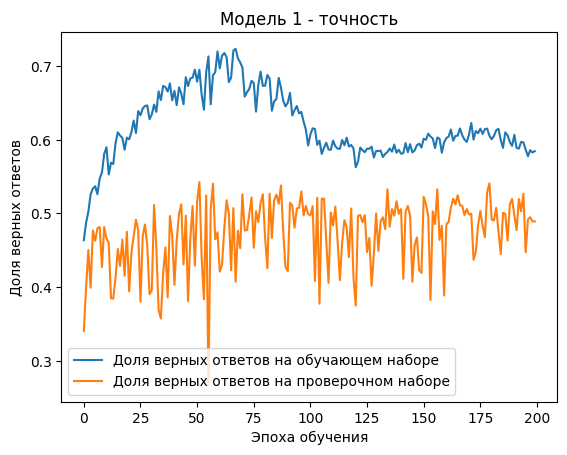

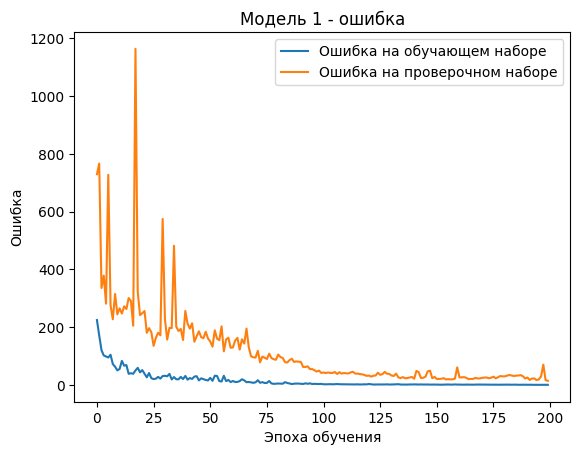

In [ ]:


# Отрисовка графика точности на обучающей выборке
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.title('Модель 1 - точность')
plt.legend()
plt.show()

# Отрисовка графика ошибки
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.title('Модель 1 - ошибка')
plt.legend()
plt.show()

# Делаем prodict для x_test

In [ ]:
y_pred = model.predict(x_test)
y_pred

74/74 [==============================] - 0s 2ms/step


array([[4.5833548e-07, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [5.1193795e-04, 1.0000000e+00, 9.9999976e-01, 9.9999964e-01],
       [7.3600672e-06, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       ...,
       [9.9711215e-01, 9.9750441e-01, 2.6130596e-02, 2.3195367e-02],
       [3.2072926e-01, 5.1729256e-01, 2.1056328e-02, 1.1181964e-02],
       [7.7473945e-03, 9.4210273e-01, 9.0669680e-01, 8.3540756e-01]],
      dtype=float32)

# попытка вывести таблицу значений с %


In [ ]:
def get_table(pred, y, class_count):
  df_res = pd.DataFrame([])
  for i in range(class_count):
    df_res["Predicted "+str(i)] = pred[:,i]

  for i in range(class_count):
    df_res["test "+str(i)] = y[:,i]

  return df_res

get_table(y_pred, y_test, NUM_CLASSES) # y_test не разбита на OHE, в отличии от y_test_np


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,test 0,test 1,test 2,test 3
0,4.583355e-07,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0
1,5.119379e-04,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0
2,7.360067e-06,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0
3,1.052320e-06,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0
4,1.765485e-03,0.999999,0.999995,0.999991,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2341,9.780052e-03,0.999840,0.999422,0.999120,0.0,1.0,0.0,0.0
2342,9.056969e-02,0.643508,0.563963,0.493617,0.0,1.0,0.0,0.0
2343,9.971122e-01,0.997504,0.026131,0.023195,0.0,1.0,0.0,0.0
2344,3.207293e-01,0.517293,0.021056,0.011182,0.0,1.0,0.0,0.0


# Добавляем матрицу ошибок confusion_matrix
Проверяем работу сети с помощью библиотеки sklearn
* используется argmax
* на данных y_test

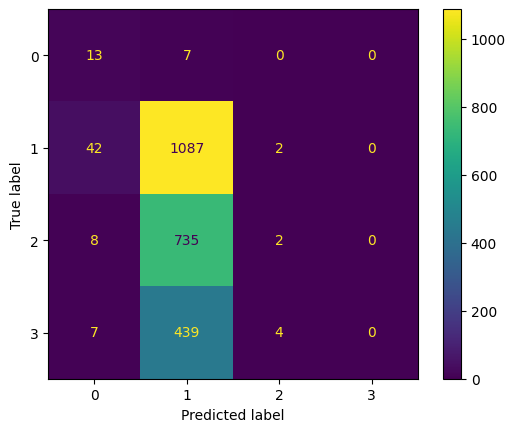

In [ ]:

# определяем argmax, OneHotEncoding преобразуем в 1d array для подачи на confusion_matrix
y_pred_argmax = np.argmax(y_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)

# строим матрицу
cm = confusion_matrix(y_test_argmax, y_pred_argmax)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Выводы
* датасет в текущем варианте не дает гарантированного ответа уйдет компания или останется, однако корреляция имеет место быть


#Эксперимент со scaler
ранее scaler был задан, но не использовался, т.к. приводил к ухудшению работы

* x_train_scaled
* x_test_scaled

Epoch 1/200
281/281 [==============================] - 1s 5ms/step - loss: 0.8257 - accuracy: 0.7450 - val_loss: 0.5246 - val_accuracy: 0.7626
Epoch 2/200
281/281 [==============================] - 1s 5ms/step - loss: 0.3751 - accuracy: 0.9015 - val_loss: 0.4171 - val_accuracy: 0.8879
Epoch 3/200
281/281 [==============================] - 1s 4ms/step - loss: 0.2854 - accuracy: 0.9381 - val_loss: 0.3555 - val_accuracy: 0.9092
Epoch 4/200
281/281 [==============================] - 2s 6ms/step - loss: 0.2209 - accuracy: 0.9615 - val_loss: 0.3139 - val_accuracy: 0.9173
Epoch 5/200
281/281 [==============================] - 2s 6ms/step - loss: 0.1739 - accuracy: 0.9678 - val_loss: 0.2682 - val_accuracy: 0.9305
Epoch 6/200
281/281 [==============================] - 1s 5ms/step - loss: 0.1350 - accuracy: 0.9779 - val_loss: 0.2720 - val_accuracy: 0.9305
Epoch 7/200
281/281 [==============================] - 1s 5ms/step - loss: 0.1072 - accuracy: 0.9824 - val_loss: 0.2403 - val_accuracy: 0.9480

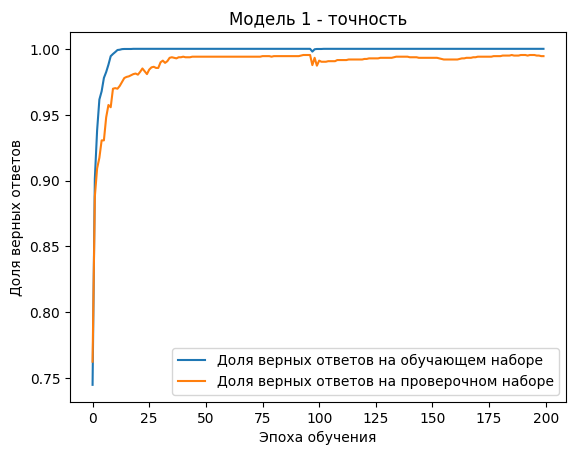

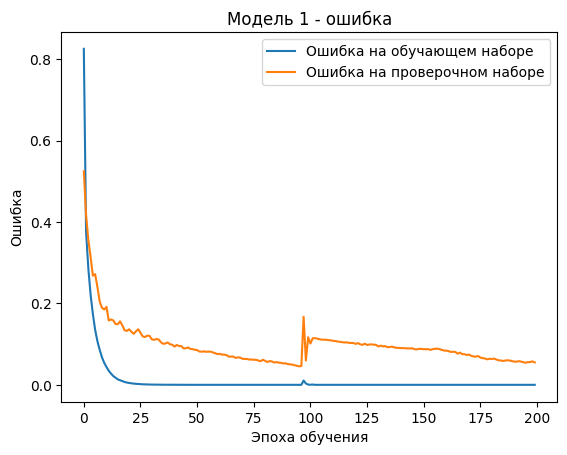

74/74 [==============================] - 0s 2ms/step


In [ ]:
######################################
# обучение
######################################
history = model.fit(
    x_train_scaled,                           # Замена на scaled ТУТ
    y_train,
    batch_size=32,
    epochs=200,
    validation_data=(x_test_scaled, y_test),  # Замена на scaled ТУТ
    verbose=1
    )
######################################
# Отрисовка графика
######################################
# Отрисовка графика точности на обучающей выборке
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.title('Модель 1 - точность')
plt.legend()
plt.show()

# Отрисовка графика ошибки
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.title('Модель 1 - ошибка')
plt.legend()
plt.show()

######################################
# predict
######################################
y_pred = model.predict(x_test_scaled)         # Замена на scaled ТУТ





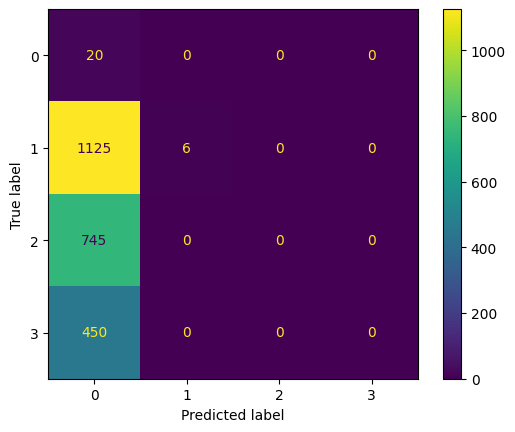

In [ ]:
######################################
# confusion_matrix
######################################
# определяем argmax, OneHotEncoding преобразуем в 1d array для подачи на confusion_matrix
y_pred_argmax = np.argmax(y_pred, axis=1)
y_test_argmax= np.argmax(y_test, axis=1)

# строим матрицу
cm = confusion_matrix(y_test_argmax, y_pred_argmax)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# Вывод 2
со скейлером обучение на тех же настройках дало провальный результат.